In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [4]:
img = np.load("../celeb_transformed/Angelina Jolie/001_fe3347c0.npy")

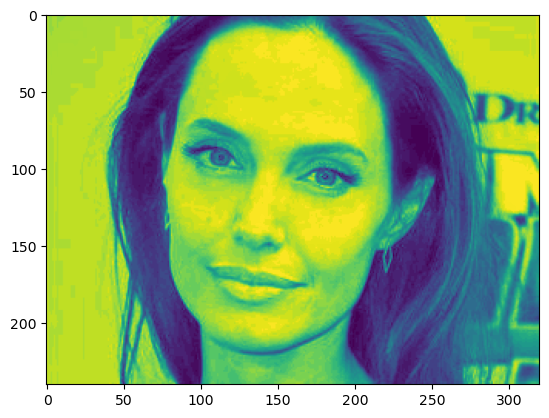

In [5]:
norm_img = img/np.max(img)
plt.imshow(norm_img.T)

In [7]:
celebs_path = Path("../celeb_transformed")
labels = [celeb.name for celeb in celebs_path.iterdir()]

In [8]:
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
le.transform(labels)

['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


array([15, 10,  5,  7, 11,  1,  6,  3, 16,  8, 14,  9,  4, 13,  2, 12,  0])

In [9]:
labels = []
data = []
for celeb in celebs_path.iterdir():
    for file in celeb.iterdir():
        img = np.load(file)
        data.append(img)
        labels.append(le.transform([celeb.name])[0])

labels = np.array(labels)
data = np.array(data)
    

In [10]:
print(labels.shape)
print(data.shape)

(1642,)
(1642, 320, 240)


In [11]:
from collections import Counter
print(Counter(labels))

Counter({13: 184, 7: 97, 3: 96, 4: 96, 11: 95, 9: 95, 2: 94, 10: 92, 8: 92, 6: 91, 15: 90, 14: 89, 12: 89, 0: 89, 5: 86, 1: 84, 16: 83})


In [12]:
train_data, validation_data, train_labels, validation_labels= model_selection.train_test_split(data,labels, random_state=42,test_size=0.2)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))

train data shape: (1313, 320, 240)
validation data shape: (329, 320, 240)
train labels shape: (1313,)
validation labels shape: (329,)


In [13]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

train_data = (train_data-mean) / std
validation_data = (validation_data-mean) / std

In [14]:
train_data = train_data[:,:,:,np.newaxis]
train_data[0].shape

(320, 240, 1)

In [15]:
classes = len(le.classes_)
classes

17

In [16]:
import gc
gc.collect()

1020

In [17]:
train_data.shape

(1313, 320, 240, 1)

In [18]:
model = keras.models.Sequential([
    #keras.layers.Input(shape=train_data[0].shape),
    keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    #keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(classes, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d (MaxPooling2D) (None, 160, 120, 1)       0         
_________________________________________________________________
dropout (Dropout)            (None, 160, 120, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 158, 118, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 57, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 26, 32)        9

2022-11-28 21:05:33.651478: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-28 21:05:33.695030: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-28 21:05:33.764698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 21:05:33.767346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 970 computeCapability: 5.2
coreClock: 1.253GHz coreCount: 13 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 208.91GiB/s
2022-11-28 21:05:33.767918: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-28 21:05:33.825528: I tensorflow/stream_executor/platform/def

In [19]:
#callback = keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=10, min_delta=0.0001, mode="auto")
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=10)#, callbacks=[callback])

2022-11-28 21:05:54.494950: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 403353600 exceeds 10% of free system memory.
2022-11-28 21:05:55.050754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-28 21:05:55.091121: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3506210000 Hz


Epoch 1/10


2022-11-28 21:05:55.637684: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-28 21:05:56.047564: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


42/42 [==============================] - ETA: 0s - loss: 2.8687 - accuracy: 0.0741

2022-11-28 21:05:59.289752: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 101068800 exceeds 10% of free system memory.


ValueError: in user code:

    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/edvin/miniconda3/envs/eitp40-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 320, 240)


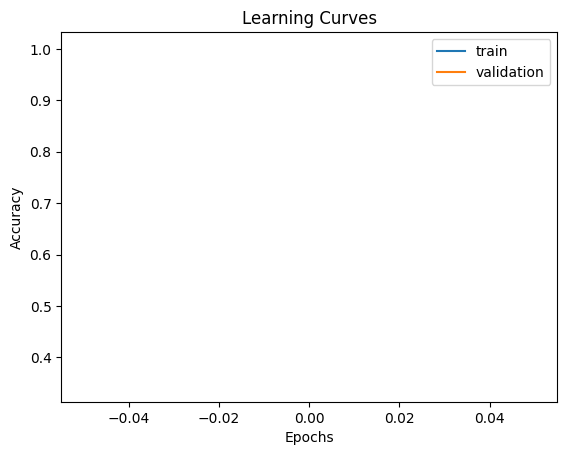

In [30]:
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [40]:
#model.save("model")

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [41]:
img_axis = img[None,:,:,np.newaxis]
img_axis.shape

(1, 320, 240, 1)

In [53]:
pred = model.predict(img_axis)
np.argmax(pred)

1/1 [==============================] - 0s 46ms/step


13

In [54]:
le.inverse_transform([np.argmax(pred)])

array(['Scarlett Johansson'], dtype='<U18')